In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from adjustText import adjust_text
import matplotlib.patheffects as pe

In [115]:
from pathlib import Path

directory_path = Path('E:/AAA_Labwork/T cells/v3/Geneformer/')
dir_names = [d.name for d in directory_path.iterdir() if d.is_dir()][1:]

txid = pd.read_csv('F:/References/tx2gene_grch38_ens94.txt',sep = '\t',index_col = 1)
id_table = pd.DataFrame(txid['symbol']).drop_duplicates().T
id_dict = id_table.to_dict(orient = 'records')[0]#index = False)
ylimmax = [80,60,100,100,130]

In [124]:
legend_locs = ['upper right','lower right','lower right','upper right']

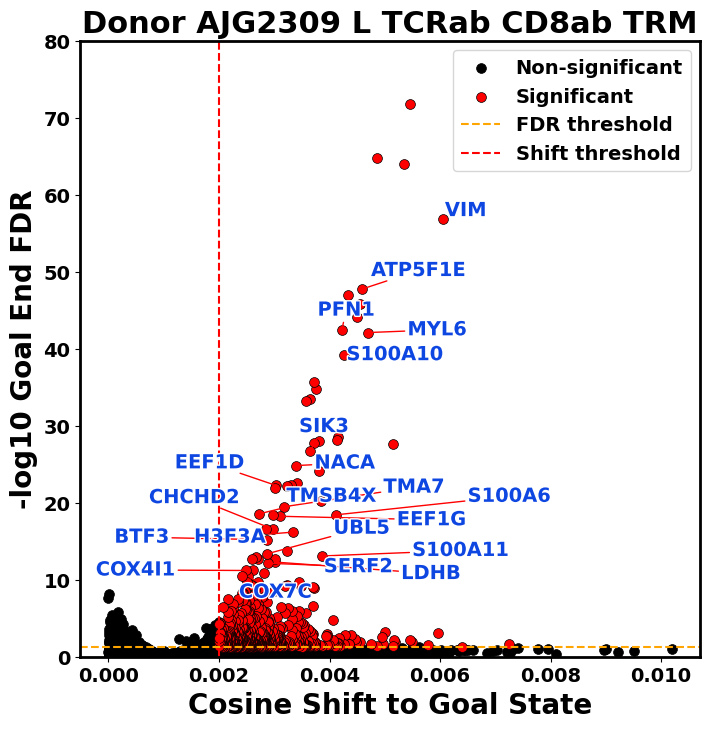

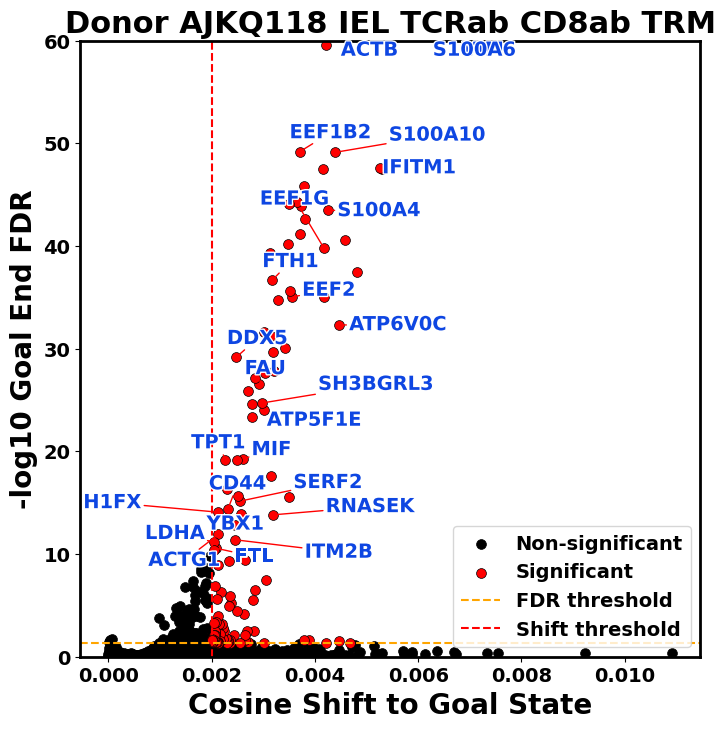

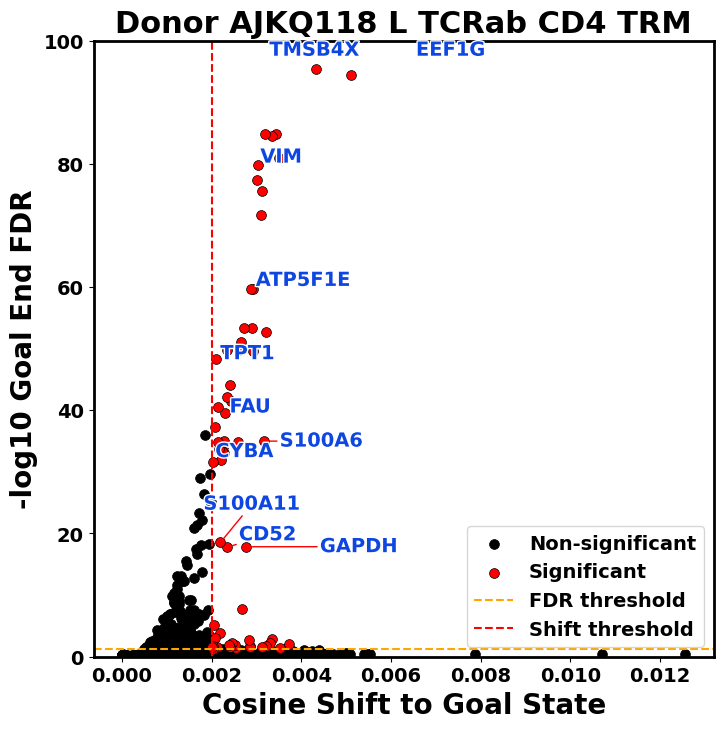

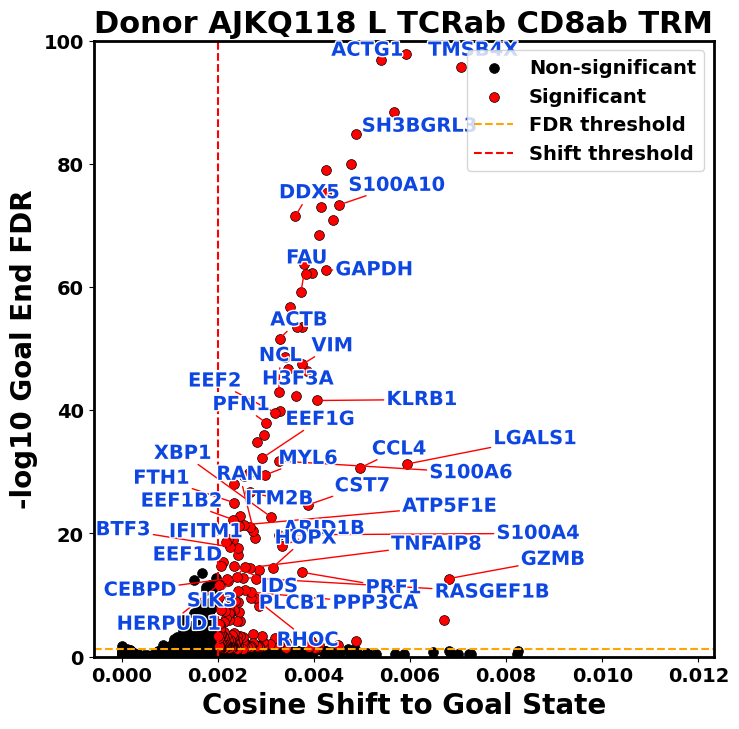

In [125]:
for j, dir_name in enumerate(dir_names):
    df = pd.read_csv(f"E:/AAA_Labwork/T cells/v3/Geneformer/{dir_name}/T_expand.csv",index_col= 3)
    #df = pd.read_csv(f"E:/AAA_Labwork/T cells/v3/Geneformer/{dir_names[1]}/T_expand.csv",index_col= 3)
    df = df.drop(columns = 'Unnamed: 0')
    
    data = df.rename(index = id_dict)
    data = data[data['Shift_to_goal_end'] > 0 ]

    # Calculate -log10(FDR)
    data['-log10_FDR'] = -np.log10(data['Goal_end_FDR'])

    # Separate significant and non-significant entries
    sig_data = data[(data['Sig'] == 1) & (data['Shift_to_goal_end'] >= 0.002)]
    non_sig_data = data[(data['Sig'] == 0) | (data['Shift_to_goal_end'] < 0.002)]

    important_list = sig_data.index[((sig_data['-log10_FDR'] > 10) | (sig_data['Shift_to_goal_end'] > 0.01)) & ~sig_data.index.str.startswith('RP') & ~sig_data.index.str.startswith('MT')& ~sig_data.index.str.startswith('ENSG')]

    # Plot settings
    plt.figure(figsize=(8, 8))
    plt.rcParams.update({'font.size': 14, 'font.weight': 'bold', 'axes.linewidth': 2})

    # Scatter plot for significant and non-significant points
    plt.scatter(non_sig_data['Shift_to_goal_end'], non_sig_data['-log10_FDR'], 
                color='black', s=50, edgecolors='black', linewidths=0.5, label='Non-significant')

    plt.scatter(sig_data['Shift_to_goal_end'], sig_data['-log10_FDR'], 
                color='red', s=50, edgecolors='black', linewidths=0.5, label='Significant')
    texts = []
    for i, row in sig_data.iterrows():
        if i in important_list:
            texts.append(plt.text(row['Shift_to_goal_end'], row['-log10_FDR'], 
                                  i, size = 14, color= '#0E46E2', weight = 'bold', #bbox=dict(boxstyle="Square,pad=0.1", fc="white", ec="b", lw=2, alpha = 0.8),
                                   path_effects=[pe.withStroke(linewidth=2, foreground="white")]))

    plt.ylim([-0.01,ylimmax[j]])
    plt.axhline(y=-np.log10(0.05), color="orange", linestyle="--", label='FDR threshold')
    plt.axvline(x=0.002, color="red", linestyle="--", label='Shift threshold')
    plt.legend(loc = legend_locs[j])

    # Adjust text to avoid overlap
    adjust_text(texts, force_static  = 0.3, force_text = 0.4, max_move  = 100, arrowprops=dict(arrowstyle='-', color='red')) #force_static  = 0.4,

    #plt.xlim([-4.5,4.5])
    # Axes labels and title
    plt.xlabel("Cosine Shift to Goal State", fontsize=20, fontweight='bold')
    plt.ylabel("-log10 Goal End FDR", fontsize=20, fontweight='bold')
    plt.title(dir_name.replace('_',' '), fontsize=22 , fontweight='bold')

    plt.savefig(dir_name+'expand.png')
    #plt.show()